In [1]:
# Built-in modules
from dataclasses import dataclass
from typing import List

# Third-party modules
import matplotlib.pyplot as plt
import numpy as np

# Local modules
from post.plotgrid import setplot_props, ifig
from pre.makegrid import seg_cells, cells_distro, input_point

## Set the bottom 2D section of the block grid

### Controls the direction of initial 'straight' lines in the 2D section.

If straight lines goes South-North: IDIR=0
<br>
If straight lines goes West-East: IDIR=1

In [8]:
while True:
        idir = input("IDIR: ")
        if idir == "1" or idir == "0":
            idir = int(idir)
            break
        else:
            print("IDIR takes '0' if straight lines goes South-North, or '1' if straight lines goes West-East.")

IDIR:  1


### Set the number of cells (Control Volumes) in I and J directions

In [9]:
# Number of cells in I and J direction
while True:
    try:
        nicv = int(input("NICV: "))
        njcv = int(input("NJCV: "))
        if nicv > 0 and njcv > 0:
            break
        else:
            print("Only positive integers values are valid. Try again.")
    except:
        print("Only positive integers values are valid. Try again.")


NICV:  100
NJCV:  20


### Define the segments of all edges. (South, North, West, East) 

In [10]:
# Define Point, Segment & Edge as dataclasses

# A point is a set of 3 floats
@dataclass
class Point:
    x: float
    y: float
    z: float = 0.0

# A segment consists of a start and end Point
@dataclass
class Segment:
    start: Point
    end: Point
    ncell: int
        
# An Edge is a list of segments
@dataclass
class Edge:
    name: str
    nlines: int
    segments: List[Segment]

In [11]:
# Define edges names (2D bottom section)
edges = ("South", "North", "West", "East")

# Ask user if all segments have uniform cell distribution
while True:
    uniform_cells = input("Are all cells of these 2D segments uniform? y/n")
    if uniform_cells == "y" or uniform_cells == "n":
        break

Are all cells of these 2D segments uniform? y/n y


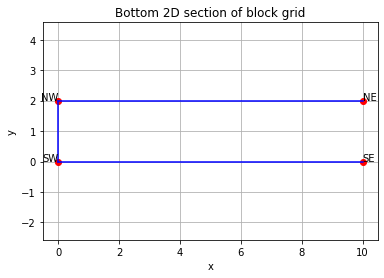

20


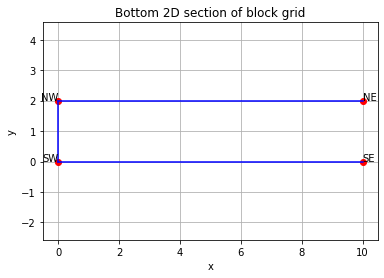

In [12]:
# Loop through edges
for edge in edges:
    
    # Number of segments needed to describe this edge.
    print(f"Number of {edge} edge segments:")
    while True:
        try:
            nlines = int(input("NLINES: "))
            if nlines > 0:
                break
            else:
                print("Only positive integers values are valid. Try again")
        except:
            print("Only postive integers values are valid. Try again")
    
    # Initialize this edge segments list
    segments = []
    
    # Loop through all segments of this edge    
    for seg in range(0,nlines):
        
        # Coordinates (x,y) of the first point in this segment of this edge. (South-West point if first (or only) segment)
        print(f"Coordinates (x,y) of first point in segment {seg + 1} of {edge} edge")
        # Ask user for point and plot it.
        if nlines == 1:
            if edge == "West":
                x0, y0 = south.segments[0].start.x, south.segments[0].start.y
            elif edge == "East":
                x0, y0 = north.segments[0].end.x, north.segments[0].end.y
            else:
                x0, y0 = input_point()
        else:
            x0, y0 = input_point()
            
        # Label the point if known        
        if nlines == 1:
            if edge == "South":
                plt.text(x0, y0, "SW", horizontalalignment="right")
            elif edge == "North":
                plt.text(x0, y0, "NW", horizontalalignment="right")
            
        # Call function to set some plot properties.
        # Set xlabel, ylabel, title.        
        setplot_props("x", "y", "Bottom 2D section of block grid")
        # Display figure
        ifig()
       
        # Coordinates (x,y) of this segment endpoint. (South-East point if first (or only) segment)
        print(f"Coordinates (x,y) of endpoint in segment {seg + 1} of {edge} edge")
        # Ask user for point and plot it.
        if nlines == 1:
            if edge == "West":
                x1, y1 = north.segments[0].start.x, north.segments[0].start.y
            elif edge == "East":
                x1, y1 = north.segments[0].end.x, north.segments[0].end.y
            else:
                x1, y1 = input_point()
        else:
            x1, y1 = input_point()
            
        # Label this point if known
        if nlines == 1:
            if edge == "South":
                plt.text(x1, y1, "SE", horizontalalignment="left")
            elif edge == "North":
                plt.text(x1, y1, "NE", horizontalalignment="left")
            
        # Plot the segment as a line
        if seg == nlines-1:
            plt.plot([x0, x1], [y0, y1], 'b')
        
        # Update figure
        ifig()

        # Distribution of cells along this segment (DX1 and EXP):
        # DX1 (if non-zero) is the size of the first cell in this segment.
        # The rest of the cells will be expanded or contracted with a factor k,
        # computed so that the NSEG cells fill the value.
        if uniform_cells == "n":
            dx1, exp = cells_distro()
        else:
            dx1, exp = 0, 0
            
        # Number of cells of this segment
        # If this edge has only one segment, nseg is equal to nicv or njcv
        ncell = seg_cells(nlines, idir, nicv, njcv, edge)
        print(ncell)
            
        # Instantiate this segment
        seg = Segment(Point(x0,y0), Point(x1,y1), ncell)
        # Append it to this edge segments list
        segments.append(seg)
        
    # Instantiate this edge
    if edge == "South":
        south = Edge(edge, nlines, segments)
    elif edge == "North":
        north = Edge(edge, nlines, segments)
    elif edge == "West":
        west = Edge(edge, nlines, segments)
    elif edge == "East":
        east = Edge(edge, nlines, segments)
        

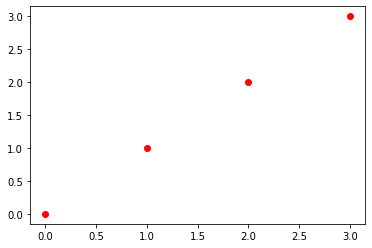

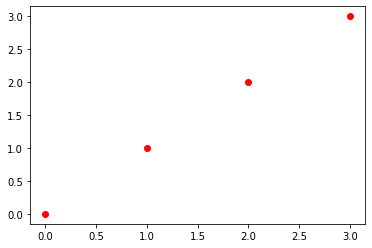

In [18]:
from IPython import display
from IPython.utils import io
import time


    


for i in range(0, 4):
    plt.plot(i,i, 'ro')
    display.clear_output(wait=True)
    # Display current figure
    if i == 3:
      with io.capture_output() as captured:
        fig = plt.gcf()
    else:
        fig = plt.gcf()
    display.display(fig)
    # Pause execution 0.1s
    time.sleep(1)